In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession, DataFrame, DataFrameNaFunctions, Column 
spark = SparkSession.builder.appName('722 iteration 4').getOrCreate()
import numpy as np

In [2]:
df = spark.read.csv('PRSA_Data_Wanliu_20130301-20170228.csv',inferSchema=True, header=True)
df.show(10)
df.columns
df.count()

+---+----+-----+---+----+-----+----+----+----+----+----+----+------+-----+----+---+----+-------+
| No|year|month|day|hour|PM2.5|PM10| SO2| NO2|  CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|station|
+---+----+-----+---+----+-----+----+----+----+----+----+----+------+-----+----+---+----+-------+
|  1|2013|    3|  1|   0|  8.0| 8.0| 6.0|28.0| 400|52.0|-0.7|1023.0|-18.8| 0.0|NNW| 4.4| Wanliu|
|  2|2013|    3|  1|   1|  9.0| 9.0| 6.0|28.0| 400|50.0|-1.1|1023.2|-18.2| 0.0|  N| 4.7| Wanliu|
|  3|2013|    3|  1|   2|  3.0| 6.0|null|19.0| 400|55.0|-1.1|1023.5|-18.2| 0.0|NNW| 5.6| Wanliu|
|  4|2013|    3|  1|   3| 11.0|30.0| 8.0|14.0|null|null|-1.4|1024.5|-19.4| 0.0| NW| 3.1| Wanliu|
|  5|2013|    3|  1|   4|  3.0|13.0| 9.0|null| 300|54.0|-2.0|1025.2|-19.5| 0.0|  N| 2.0| Wanliu|
|  6|2013|    3|  1|   5|  3.0| 6.0| 8.0|17.0| 300|54.0|-2.2|1025.6|-19.6| 0.0|  N| 3.7| Wanliu|
|  7|2013|    3|  1|   6|  3.0| 3.0|10.0|21.0| 300|52.0|-2.6|1026.5|-19.1| 0.0|NNE| 2.5| Wanliu|
|  8|2013|    3|  1|   7|  3.0

35064

In [3]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM2.5: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- CO: integer (nullable = true)
 |-- O3: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- RAIN: double (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: double (nullable = true)
 |-- station: string (nullable = true)



In [4]:
import pyspark.sql.functions as func

In [5]:
df = df.withColumnRenamed('PM2.5', 'Target')
data = df.withColumn('Target',func.round(df["Target"]).cast('integer'))
data.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- Target: integer (nullable = true)
 |-- PM10: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- CO: integer (nullable = true)
 |-- O3: double (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- PRES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- RAIN: double (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: double (nullable = true)
 |-- station: string (nullable = true)



In [6]:
data.agg({"target":"mean"}).show()

+-----------------+
|      avg(target)|
+-----------------+
|83.37477654114527|
+-----------------+



In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

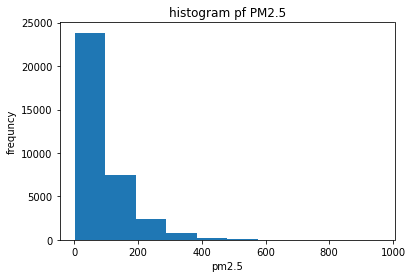

In [8]:
TarArr = np.array(data.filter('Target > 0').select('Target').collect())
fig, ax = plt.subplots()
ax.set_title('histogram pf PM2.5')
ax.set_xlabel('pm2.5')
ax.set_ylabel('frequncy')
plt.hist(TarArr)
plt.show()

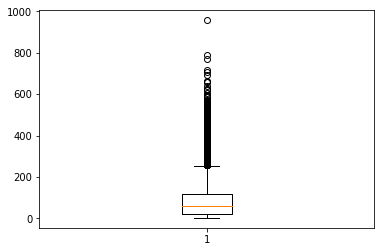

In [9]:
plt.boxplot(TarArr)
plt.show()

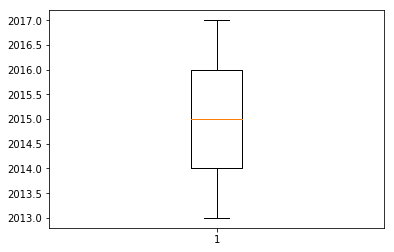

In [10]:
yeaArr = np.array(data.filter('year > 0').select('year').collect())
plt.boxplot(yeaArr)
plt.show()

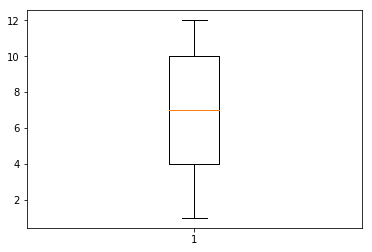

In [11]:
monArr = np.array(data.filter('month > 0').select('month').collect())
plt.boxplot(monArr)
plt.show()

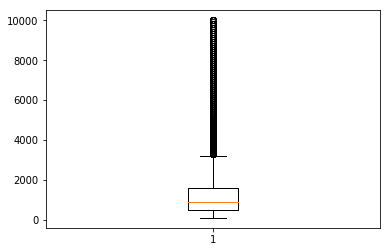

In [12]:
COArr = np.array(data.filter('CO > 0').select('CO').collect())
plt.boxplot(COArr)
plt.show()

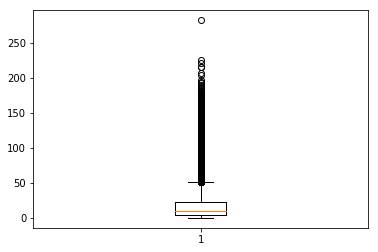

In [13]:
SO2Arr = np.array(data.filter('SO2 > 0').select('SO2').collect())
plt.boxplot(SO2Arr)
plt.show()

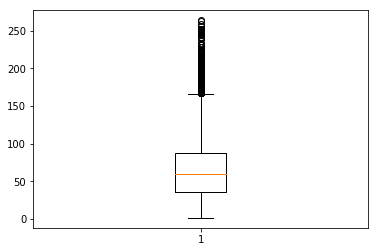

In [14]:
NO2Arr = np.array(data.filter('NO2 > 0').select('NO2').collect())
plt.boxplot(NO2Arr)
plt.show()

In [15]:
pdata = data.toPandas()
print(pdata.corr()['Target'])

No       -0.070245
year     -0.073706
month     0.018799
day       0.005263
hour      0.002709
Target    1.000000
PM10      0.882449
SO2       0.496624
NO2       0.671158
CO        0.749722
O3       -0.155538
TEMP     -0.133353
PRES      0.005119
DEWP      0.102390
RAIN     -0.012699
WSPM     -0.244170
Name: Target, dtype: float64


In [16]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [17]:
import seaborn as sns

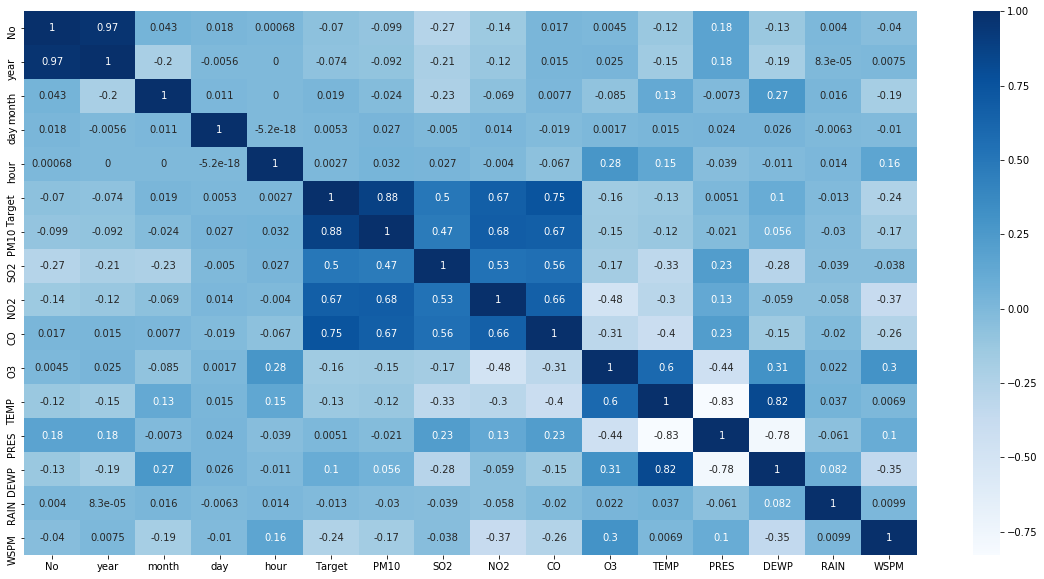

In [18]:

Tar_corr = pdata.corr()
fig = plt.figure(figsize=(20,10))
sns.heatmap(Tar_corr, annot=True,cmap = 'Blues')

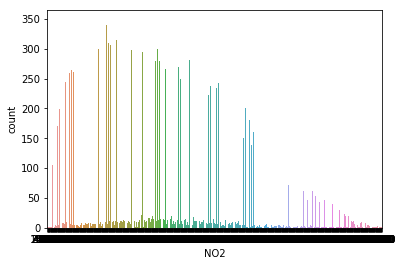

In [19]:
sns.countplot(x='NO2',data=pdata)

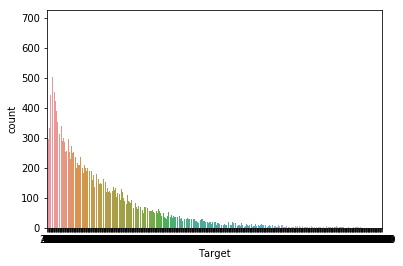

In [20]:
sns.countplot(x='Target',data=pdata)

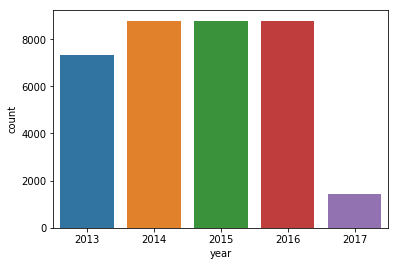

In [21]:
sns.countplot(x='year',data=pdata)

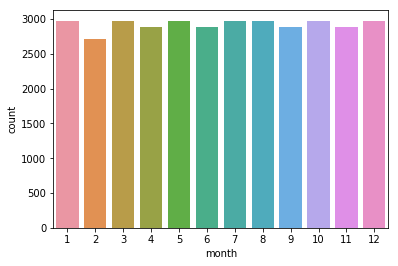

In [22]:
sns.countplot(x='month',data=pdata)

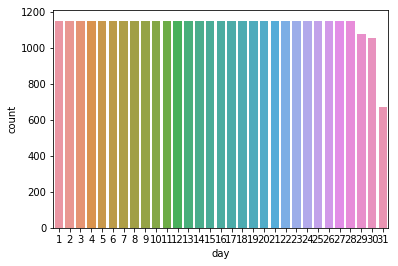

In [23]:
sns.countplot(x='day',data=pdata)

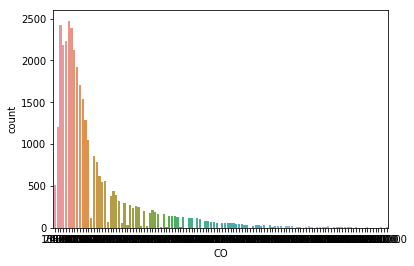

In [24]:
sns.countplot(x='CO',data=pdata)

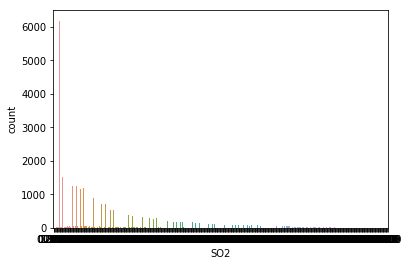

In [25]:
sns.countplot(x='SO2',data=pdata)

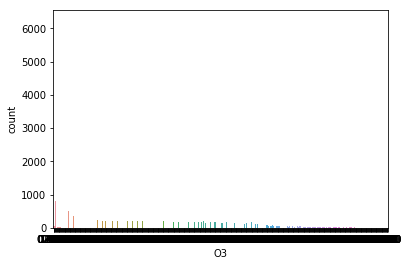

In [26]:
sns.countplot(x='O3',data=pdata)

In [27]:
print(pdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
Target     34682 non-null float64
PM10       34780 non-null float64
SO2        34489 non-null float64
NO2        33994 non-null float64
CO         33252 non-null float64
O3         32957 non-null float64
TEMP       35044 non-null float64
PRES       35044 non-null float64
DEWP       35044 non-null float64
RAIN       35044 non-null float64
wd         35064 non-null object
WSPM       35050 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [28]:
data.describe().show()

+-------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-------------------+-----+------------------+-------+
|summary|               No|              year|            month|               day|             hour|           Target|              PM10|               SO2|              NO2|                CO|               O3|              TEMP|              PRES|              DEWP|               RAIN|   wd|              WSPM|station|
+-------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-------------------+-----+------------------+-------+
|  count|            35064|    

In [29]:
data = data.na.fill(0)

In [30]:
data.describe().show()

+-------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----+------------------+-------+
|summary|               No|              year|            month|               day|             hour|           Target|              PM10|               SO2|              NO2|                CO|                O3|              TEMP|              PRES|              DEWP|               RAIN|   wd|              WSPM|station|
+-------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+-----+------------------+-------+
|  count|            35064| 

In [31]:
new_data = data.withColumn("NewPM2.5", data['Target'])
new_data.show()

+---+----+-----+---+----+------+----+----+----+---+----+----+------+-----+----+---+----+-------+--------+
| No|year|month|day|hour|Target|PM10| SO2| NO2| CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|station|NewPM2.5|
+---+----+-----+---+----+------+----+----+----+---+----+----+------+-----+----+---+----+-------+--------+
|  1|2013|    3|  1|   0|     8| 8.0| 6.0|28.0|400|52.0|-0.7|1023.0|-18.8| 0.0|NNW| 4.4| Wanliu|       8|
|  2|2013|    3|  1|   1|     9| 9.0| 6.0|28.0|400|50.0|-1.1|1023.2|-18.2| 0.0|  N| 4.7| Wanliu|       9|
|  3|2013|    3|  1|   2|     3| 6.0| 0.0|19.0|400|55.0|-1.1|1023.5|-18.2| 0.0|NNW| 5.6| Wanliu|       3|
|  4|2013|    3|  1|   3|    11|30.0| 8.0|14.0|  0| 0.0|-1.4|1024.5|-19.4| 0.0| NW| 3.1| Wanliu|      11|
|  5|2013|    3|  1|   4|     3|13.0| 9.0| 0.0|300|54.0|-2.0|1025.2|-19.5| 0.0|  N| 2.0| Wanliu|       3|
|  6|2013|    3|  1|   5|     3| 6.0| 8.0|17.0|300|54.0|-2.2|1025.6|-19.6| 0.0|  N| 3.7| Wanliu|       3|
|  7|2013|    3|  1|   6|     3| 3.0|10.0|21.0

In [32]:
df2 = spark.read.csv('PRSA_Data_Wanliu_20130301-20170228.csv',inferSchema=True, header=True)

In [33]:
from pyspark.sql import DataFrame
newd = data.union(df2)
newd.show()


+---+----+-----+---+----+------+----+----+----+---+----+----+------+-----+----+---+----+-------+
| No|year|month|day|hour|Target|PM10| SO2| NO2| CO|  O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|station|
+---+----+-----+---+----+------+----+----+----+---+----+----+------+-----+----+---+----+-------+
|  1|2013|    3|  1|   0|   8.0| 8.0| 6.0|28.0|400|52.0|-0.7|1023.0|-18.8| 0.0|NNW| 4.4| Wanliu|
|  2|2013|    3|  1|   1|   9.0| 9.0| 6.0|28.0|400|50.0|-1.1|1023.2|-18.2| 0.0|  N| 4.7| Wanliu|
|  3|2013|    3|  1|   2|   3.0| 6.0| 0.0|19.0|400|55.0|-1.1|1023.5|-18.2| 0.0|NNW| 5.6| Wanliu|
|  4|2013|    3|  1|   3|  11.0|30.0| 8.0|14.0|  0| 0.0|-1.4|1024.5|-19.4| 0.0| NW| 3.1| Wanliu|
|  5|2013|    3|  1|   4|   3.0|13.0| 9.0| 0.0|300|54.0|-2.0|1025.2|-19.5| 0.0|  N| 2.0| Wanliu|
|  6|2013|    3|  1|   5|   3.0| 6.0| 8.0|17.0|300|54.0|-2.2|1025.6|-19.6| 0.0|  N| 3.7| Wanliu|
|  7|2013|    3|  1|   6|   3.0| 3.0|10.0|21.0|300|52.0|-2.6|1026.5|-19.1| 0.0|NNE| 2.5| Wanliu|
|  8|2013|    3|  1|   7|   3.

In [34]:
columns_to_drop = ['No','year','PM10','wd', 'station']

data = data.drop(*columns_to_drop)
data.show()

+-----+---+----+------+----+----+---+----+----+------+-----+----+----+
|month|day|hour|Target| SO2| NO2| CO|  O3|TEMP|  PRES| DEWP|RAIN|WSPM|
+-----+---+----+------+----+----+---+----+----+------+-----+----+----+
|    3|  1|   0|     8| 6.0|28.0|400|52.0|-0.7|1023.0|-18.8| 0.0| 4.4|
|    3|  1|   1|     9| 6.0|28.0|400|50.0|-1.1|1023.2|-18.2| 0.0| 4.7|
|    3|  1|   2|     3| 0.0|19.0|400|55.0|-1.1|1023.5|-18.2| 0.0| 5.6|
|    3|  1|   3|    11| 8.0|14.0|  0| 0.0|-1.4|1024.5|-19.4| 0.0| 3.1|
|    3|  1|   4|     3| 9.0| 0.0|300|54.0|-2.0|1025.2|-19.5| 0.0| 2.0|
|    3|  1|   5|     3| 8.0|17.0|300|54.0|-2.2|1025.6|-19.6| 0.0| 3.7|
|    3|  1|   6|     3|10.0|21.0|300|52.0|-2.6|1026.5|-19.1| 0.0| 2.5|
|    3|  1|   7|     3|11.0|26.0|300|47.0|-1.6|1027.4|-19.1| 0.0| 3.8|
|    3|  1|   8|     7|14.0|39.0|400|36.0| 0.1|1028.3|-19.2| 0.0| 4.1|
|    3|  1|   9|     3|12.0|31.0|400|46.0| 1.2|1028.5|-19.3| 0.0| 2.6|
|    3|  1|  10|     3|12.0|30.0|400|49.0| 1.9|1028.2|-19.4| 0.0| 3.6|
|    3

In [35]:
from pyspark.ml.feature import VectorSlicer
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import Row
from pyspark.ml.feature import VectorAssembler

In [36]:
inputCols = list(set(data.columns)-set(['Target']))
print(inputCols)
assembler = VectorAssembler(inputCols=inputCols,outputCol='features')
output = assembler.transform(data)
output.printSchema()

['RAIN', 'NO2', 'PRES', 'hour', 'day', 'SO2', 'CO', 'WSPM', 'month', 'TEMP', 'O3', 'DEWP']
root
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- Target: integer (nullable = true)
 |-- SO2: double (nullable = false)
 |-- NO2: double (nullable = false)
 |-- CO: integer (nullable = true)
 |-- O3: double (nullable = false)
 |-- TEMP: double (nullable = false)
 |-- PRES: double (nullable = false)
 |-- DEWP: double (nullable = false)
 |-- RAIN: double (nullable = false)
 |-- WSPM: double (nullable = false)
 |-- features: vector (nullable = true)



In [37]:
from numpy import allclose
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer

In [38]:
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=12, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="Target")

result = selector.fit(output).transform(output)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())

selector.fit(output).selectedFeatures

ChiSqSelector output with top 12 features selected


[1, 4, 5, 6, 8, 3, 0, 2, 7, 9, 10, 11]

In [39]:
from pyspark.ml.regression import RandomForestRegressor

In [40]:
rfr = RandomForestRegressor(numTrees=3, maxDepth=2, labelCol="Target", seed=42)
model = rfr.fit(output)
print(model.featureImportances)

(12,[1,5,6,11],[0.2672637201880413,0.28464070589960405,0.3387435232107169,0.1093520507016379])


In [41]:
import pandas as pd
import sklearn
from sklearn.utils import resample
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame
import matplotlib.pyplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe3bf1ddd8>,
      dtype=object)

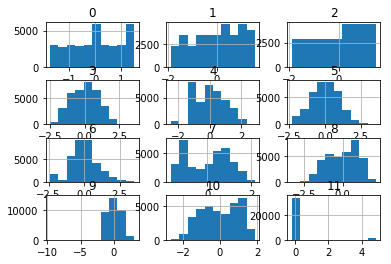

In [42]:
newd = data.toPandas()
new_data = newd.values[:, :-1]
pt = PowerTransformer(method='yeo-johnson')
new_data = pt.fit_transform(new_data)
# convert the array back to a dataframe
dataset1 = DataFrame(new_data)
# histograms of the variables
dataset1.hist()


In [43]:
from pyspark.ml.feature import MinMaxScaler
sca = MinMaxScaler( min=0, max=200, inputCol="features", outputCol="scaledFeatures",)
scam = sca.fit(output)
scaData = scam.transform(output)
print("Features scaled range: [%f, %f]" % (sca.getMin(), sca.getMax()))
scaData.head(6)

Features scaled range: [0.000000, 200.000000]


[Row(month=3, day=1, hour=0, Target=8, SO2=6.0, NO2=28.0, CO=400, O3=52.0, TEMP=-0.7, PRES=1023.0, DEWP=-18.8, RAIN=0.0, WSPM=4.4, features=DenseVector([0.0, 28.0, 1023.0, 0.0, 1.0, 6.0, 400.0, 4.4, 3.0, -0.7, 52.0, -18.8]), scaledFeatures=DenseVector([0.0, 21.2121, 196.674, 0.0, 0.0, 4.2553, 8.0, 78.5714, 36.3636, 53.6412, 28.5714, 50.7886])),
 Row(month=3, day=1, hour=1, Target=9, SO2=6.0, NO2=28.0, CO=400, O3=50.0, TEMP=-1.1, PRES=1023.2, DEWP=-18.2, RAIN=0.0, WSPM=4.7, features=DenseVector([0.0, 28.0, 1023.2, 1.0, 1.0, 6.0, 400.0, 4.7, 3.0, -1.1, 50.0, -18.2]), scaledFeatures=DenseVector([0.0, 21.2121, 196.7125, 8.6957, 0.0, 4.2553, 8.0, 83.9286, 36.3636, 52.2202, 27.4725, 52.6814])),
 Row(month=3, day=1, hour=2, Target=3, SO2=0.0, NO2=19.0, CO=400, O3=55.0, TEMP=-1.1, PRES=1023.5, DEWP=-18.2, RAIN=0.0, WSPM=5.6, features=DenseVector([0.0, 19.0, 1023.5, 2.0, 1.0, 0.0, 400.0, 5.6, 3.0, -1.1, 55.0, -18.2]), scaledFeatures=DenseVector([0.0, 14.3939, 196.7702, 17.3913, 0.0, 0.0, 8.0, 1

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [45]:
train_data,test_data = output.randomSplit([0.7,0.3])

In [46]:
print("Training data:",train_data.count())
print("Test data:",test_data.count())

Training data: 24529
Test data: 10535


In [47]:
lr = LinearRegression(featuresCol='features', labelCol='Target', predictionCol='prediction')
lrModel = lr.fit(train_data)

In [48]:
rf = RandomForestRegressor(labelCol="Target", featuresCol="features", numTrees=20)
rfModel = rf.fit(train_data)


In [49]:
train=newd.sample(frac=0.7,random_state=3) #random state is a seed value
test=newd.drop(train.index)

In [50]:
columns = newd.columns.tolist()
#print(columns)
columns = [c for c in columns if c not in ["No","year","PM10","Target","station","wd"]]
target = "Target"

In [51]:
neural  = MLPRegressor(max_iter=300).fit(train[columns],train[target])
prediction1= neural.predict(test[columns])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [53]:
linear = LinearRegression().fit(train[columns],train[target])
prediction2 = linear.predict(test[columns])

In [54]:
lr_predictions = lrModel.transform(test_data)
lr_predictions.select("prediction","Target").show(8)
print("Intercept: {}".format(lrModel.intercept))
columns = ['WSPM', 'RAIN', 'month', 'O3', 'PRES', 'NO2', 'SO2', 'CO', 'DEWP', 'TEMP', 'hour', 'day']
df = pd.DataFrame({'attributes': columns, 'coefficient': lrModel.coefficients,})
print(df)

test_results = lrModel.evaluate(test_data)
print('Model: linear regression')
print("rootMeanSquaredError: {}".format(test_results.rootMeanSquaredError))
print("meanSquaredError: {}".format(test_results.meanSquaredError))
print("meanAbsoluteError: {}".format(test_results.meanAbsoluteError))
#print("Explained variance: {}".format(test_results.explainedVariance))
print('Explained_variance_score:', explained_variance_score(prediction2,test[target]))
print("R2: {}".format(test_results.r2))
test_results.residuals.show(8)

+------------------+------+
|        prediction|Target|
+------------------+------+
|103.36291939050628|    68|
|192.88156243525654|   141|
|166.71637200723282|   121|
| 261.6223092151481|   453|
| 262.0779576436986|   445|
|-37.20074549569176|     4|
|152.78974778795273|    95|
| 268.3697939971457|   443|
+------------------+------+
only showing top 8 rows

Intercept: -15.500883638927258
   attributes  coefficient
0        WSPM    -0.707917
1        RAIN     0.731059
2       month    -0.006239
3          O3     0.093093
4        PRES     0.003659
5         NO2     0.529360
6         SO2     0.028774
7          CO     7.818819
8        DEWP     0.872802
9        TEMP    -1.709315
10       hour     0.200601
11        day     2.354170
Model: linear regression
rootMeanSquaredError: 50.3104426003331
meanSquaredError: 2531.140634641411
meanAbsoluteError: 34.22538446479498
Explained_variance_score: 0.42244872730091654
R2: 0.6328185164606501
+-------------------+
|          residuals|
+------

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [56]:
co = pd.DataFrame({'coefficient': neural.coefs_} )
print(co)
print('MLPregressor')
print('mean_absolute_error:',mean_absolute_error(prediction1,test[target]))
print('mean_squared_error:', mean_squared_error(prediction1,test[target]))
print('Explained_variance_score:', explained_variance_score(prediction1,test[target]))
print('R2 score:', neural.score(test[columns],test[target]))


                                         coefficient
0  [[0.20383878174480397, -0.008774803477358031, ...
1  [[-0.07072106992750574], [0.010912120419558987...
MLPregressor
mean_absolute_error: 26.816307329428337
mean_squared_error: 1624.8075747957907
Explained_variance_score: 0.6964063665376585
R2 score: -2937.911263197314


In [57]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state = 1).fit(train[columns],train[target])
prediction3 = Forest.predict(test[columns])

In [58]:
rf_predictions = rfModel.transform(test_data)
rf_evaluator = RegressionEvaluator(
    labelCol="Target", predictionCol="prediction")
rf_predictions.select("prediction","Target").show(10)
df = pd.DataFrame({'Attributes': columns, 'Feature Importances': rfModel.featureImportances,})
print('# of trees:', rfModel.getNumTrees)
print(df)
print('Model: Random forest Regressor')
print('rootMeanSquaredError:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "rmse"}))
print('meanSquaredError:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "mse"}))
print('meanAbsoluteError:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "mae"}))
print('Explained_variance_score:', explained_variance_score(prediction3,test[target]))
#print('Explained_variance_score:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "var"}))
print('R2:', rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "r2"}))

+------------------+------+
|        prediction|Target|
+------------------+------+
|114.52899032430712|    68|
|156.57467410044796|   141|
| 139.5217307095465|   121|
| 310.3408314409635|   453|
| 310.3408314409635|   445|
| 32.53720754211299|     4|
| 150.2049808909201|    95|
|243.73487188198465|   443|
|151.73482135248452|    89|
|301.50608381392857|   425|
+------------------+------+
only showing top 10 rows

# of trees: 20
   Attributes  Feature Importances
0        WSPM             0.000030
1        RAIN             0.287162
2       month             0.016284
3          O3             0.001436
4        PRES             0.003772
5         NO2             0.111396
6         SO2             0.447606
7          CO             0.020669
8        DEWP             0.009403
9        TEMP             0.017385
10       hour             0.036949
11        day             0.047907
Model: Random forest Regressor
rootMeanSquaredError: 46.68385717510091
meanSquaredError: 2179.3825207452205
mean

In [59]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.regression import RandomForestRegressor

In [60]:
dtc = DecisionTreeRegressor(labelCol='Target',featuresCol='features')
rfc = RandomForestRegressor(labelCol='Target',featuresCol='features')
gbt = GBTRegressor(labelCol='Target',featuresCol='features')

In [61]:
from pyspark.ml import Pipeline

def datamining(model):
    pipeline = Pipeline(stages=[assembler, model])
    fit_model = pipeline.fit(train_data)
    results = fit_model.transform(test_data)
    from pyspark.ml.evaluation import BinaryRegressionEvaluator
    my_eval = BinaryRegressionEvaluator(rawPredictionCol='prediction',
                                       labelCol='Target')
    results.select('Target','prediction').show()
    # We can then evaluate using AUC (area under the curve). AUC is linked to ROC.
    AUC = my_eval.evaluate(results)
    print("AUC is: ",AUC)
    # Let's import the evaluator.
    from pyspark.ml.evaluation import MulticlassRegressionEvaluator
    # Select (prediction, true label) and compute test error. 
    acc_evaluator = MulticlassRegressionEvaluator(labelCol="Target", predictionCol="prediction", metricName="accuracy")
    acc = acc_evaluator.evaluate(results)
    # Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
    print("Here are the results!")
    print('-'*40)
    print('Accuracy: {0:2.2f}%'.format(acc*100))

In [62]:
print(newd.info())
print(newd.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
month     35064 non-null int64
day       35064 non-null int64
hour      35064 non-null int64
Target    35064 non-null int64
SO2       35064 non-null float64
NO2       35064 non-null float64
CO        35064 non-null int64
O3        35064 non-null float64
TEMP      35064 non-null float64
PRES      35064 non-null float64
DEWP      35064 non-null float64
RAIN      35064 non-null float64
WSPM      35064 non-null float64
dtypes: float64(8), int64(5)
memory usage: 3.5 MB
None
              month           day          hour        Target           SO2  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean       6.522930     15.729637     11.500000     82.466461     18.075132   
std        3.448752      8.800218      6.922285     81.916675     22.544625   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000   

In [63]:
train_data.describe().show()

# And our testing data.
test_data.describe().show()


+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+
|summary|             month|               day|              hour|           Target|               SO2|               NO2|                CO|               O3|              TEMP|              PRES|              DEWP|               RAIN|              WSPM|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+
|  count|             24529|             24529|             24529|            24529|             24529|             24529|             24529|            24529|             24529|             24529|             24529|              24

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
# histogram 

number of iteration: 111
number of layers: 3
loss value: 770.0793919441425


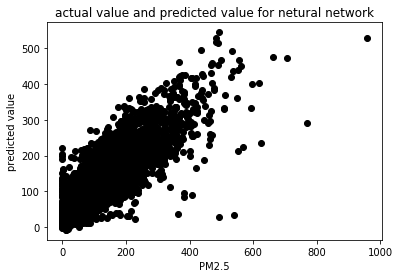

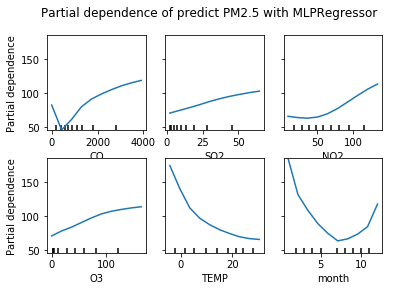

In [65]:
plt.plot(test[target], prediction1,'o', color='black' )
plt.title('actual value and predicted value for netural network')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')
print('number of iteration:', neural.n_iter_)
print('number of layers:', neural.n_layers_)
print('loss value:',neural.loss_)
plt.show()

neurals = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
neurals.fit(train[columns],train[target])

features = ['CO','SO2','NO2','O3','TEMP','month']
plot_partial_dependence(neurals, train[columns], features,
                      n_jobs=1, grid_resolution=10)
fig = plt.gcf()
fig.suptitle('Partial dependence of predict PM2.5 with MLPRegressor')
fig.subplots_adjust(hspace=0.3)

   attributes  coefficient
0        WSPM     0.871348
1        RAIN    -0.018874
2       month     0.101348
3          O3     0.527844
4        PRES     0.738297
5         NO2     0.028167
6         SO2     0.204329
7          CO    -1.784528
8        DEWP     0.001807
9        TEMP     2.405778
10       hour    -0.902467
11        day     7.674506


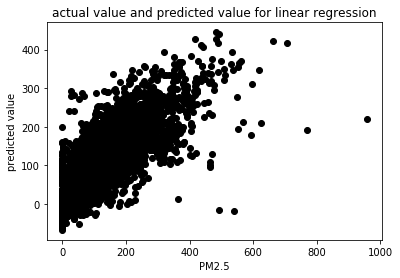

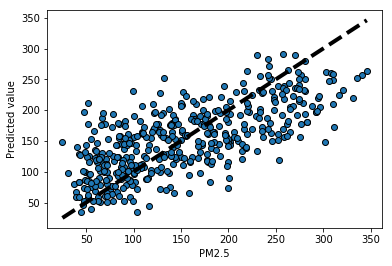

In [66]:
plt.plot(test[target], prediction2,'o', color='black' )
plt.title('actual value and predicted value for linear regression')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')
co = pd.DataFrame({'attributes': columns, 'coefficient': linear.coef_})
print(co)
X,y = datasets.load_diabetes(return_X_y=True)
predicted = cross_val_predict(linear,X,y,cv =20)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('PM2.5')
ax.set_ylabel('Predicted value')
plt.show()

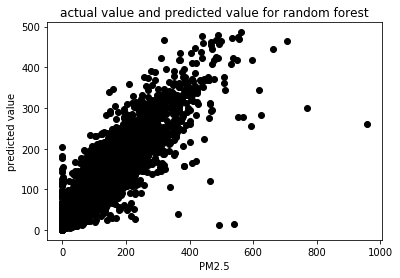

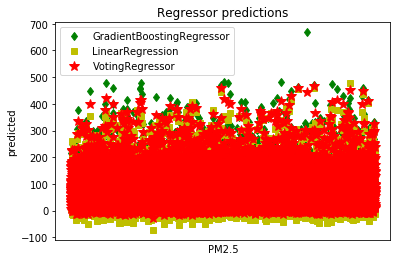

In [67]:
plt.plot(test[target], prediction3,'o', color='black' )
plt.title('actual value and predicted value for random forest')
plt.xlabel('PM2.5')
plt.ylabel('predicted value')
#importance = Forest.feature_importances_
#df = pd.DataFrame({'attributes': columns, 'importances':importance})
#print(df)
reg1 = GradientBoostingRegressor(random_state=1)
reg3 = LinearRegression()
x = train[columns]
y = train[target]
reg1.fit(x,y)
reg3.fit(x,y)
ereg = VotingRegressor([('gb', reg1), ('lr', reg3)])
ereg.fit(x,y)
xt = x[:10500]
pred1 = reg1.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('PM2.5')
plt.legend(loc="best")
plt.title('Regressor predictions')
plt.show()